In [8]:
# from pyabsa import ABSAInstruction
import pandas as pd
import torch
import matplotlib.pyplot as plt
import ast
import wordcloud
from collections import defaultdict, Counter

In [2]:
generator_ss_model_less_cat = ABSAInstruction.ABSAGenerator(
        "checkpoints/multitask/kevinscariaate_tk-instruct-base-def-pos-neg-neut-combined-quadruple-ss-less-cat/checkpoint-17028")

<Figure size 1000x600 with 0 Axes>

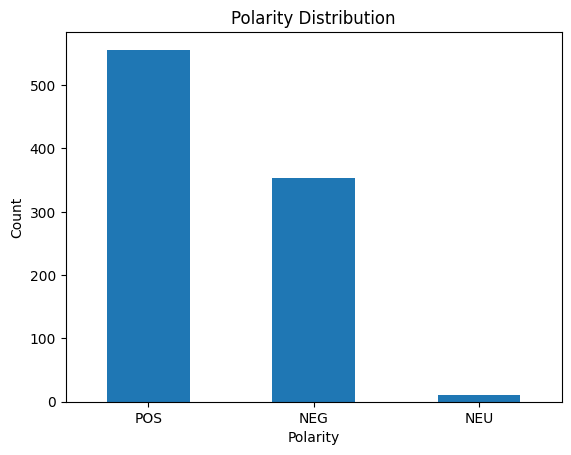

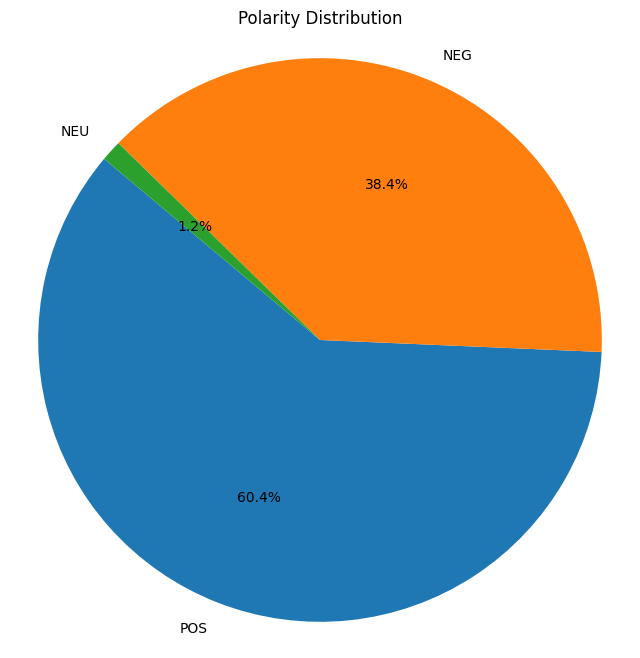

In [5]:
# Path to the CSV file with text and predictions
input_csv = 'tanah-merah-bali-hotel-quadruple.csv'  # Replace with the path to your input CSV file

# Load the CSV file into a DataFrame
df_predictions = pd.read_csv(input_csv)


# Extract the quadruples (converting string representation to list of dictionaries)
df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract polarity values
polarities = []
for quads in df_predictions['quadruples']:
    for quad in quads:
        polarities.append(quad['polarity'])

# Count occurrences of each polarity
polarity_counts = Counter(polarities)

# Create a DataFrame for visualization
polarity_df = pd.DataFrame.from_dict(polarity_counts, orient='index', columns=['count'])

# Plot the polarity distribution
plt.figure(figsize=(10, 6))
polarity_df.plot(kind='bar', legend=False)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot the polarity distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(polarity_df['count'], labels=polarity_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Polarity Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Top aspects with polarities for EXPERIENCE,AMBIENCE category:
                             count
aspect             polarity       
place              POS           7
resort             POS           3
staff              POS           2
resort             NEG           2
acoustics          NEG           2
ambience           POS           2
place              NEG           2
ambiance           POS           2
sky garden         NEG           1
tanah merah resort POS           1




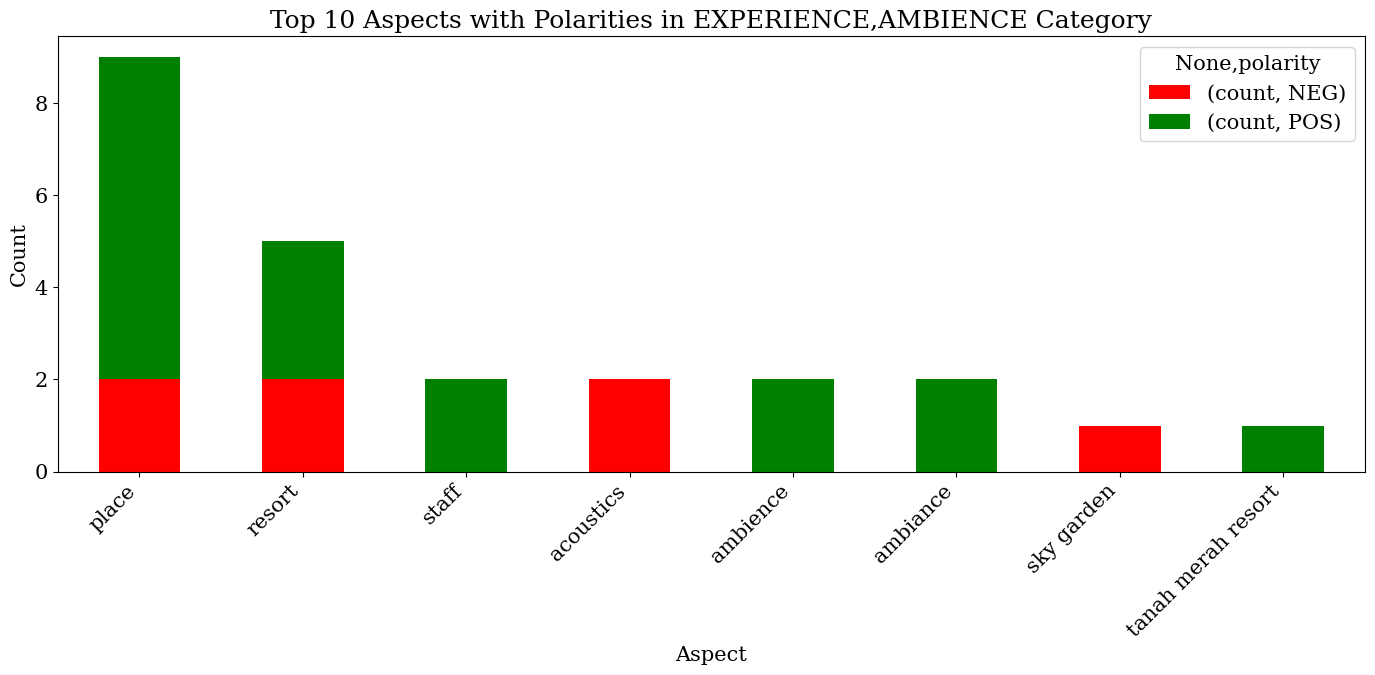

Top aspects with polarities for HOTEL category:
                     count
aspect     polarity       
place      POS          18
property   POS          10
hotel      NEG           9
           POS           8
place      NEG           6
resort     POS           5
everything NEG           4
           POS           4
prices     NEG           3
price      NEG           3




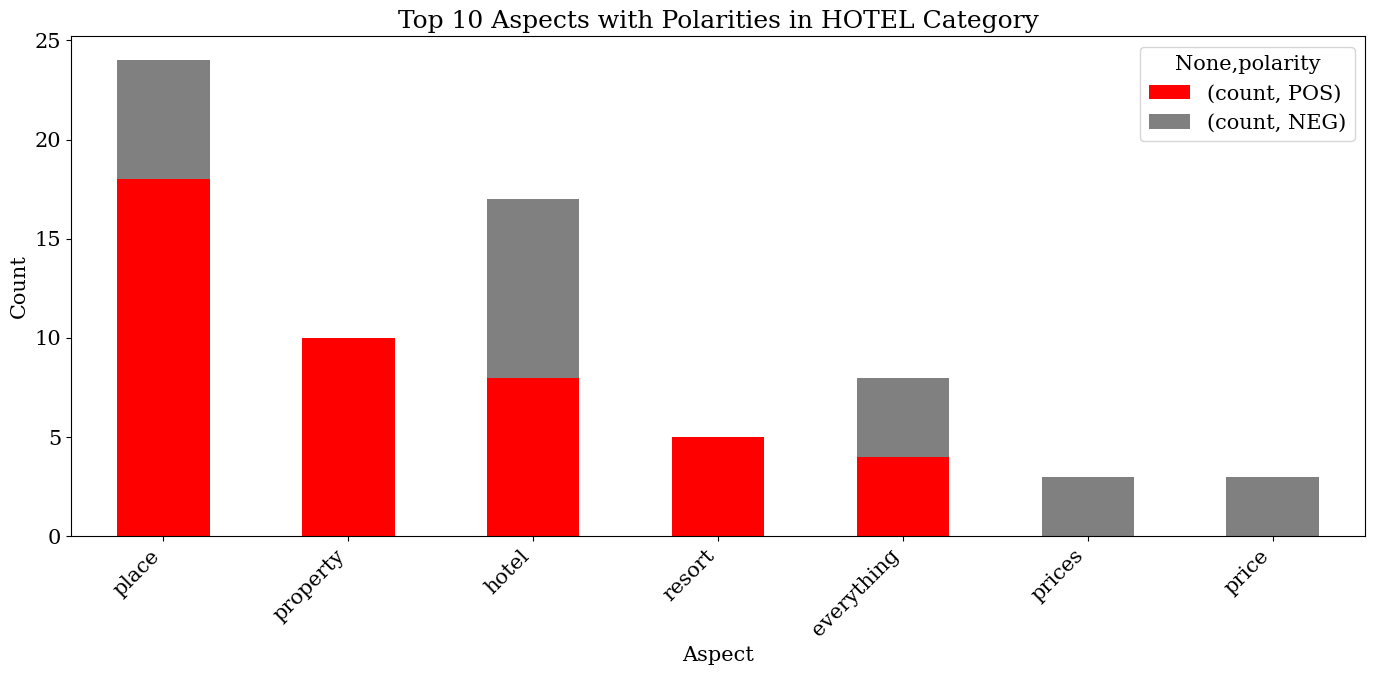

Top aspects with polarities for LOCATION category:
                      count
aspect      polarity       
location    POS          55
views       POS          20
view        POS          17
location    NEG           8
restaurants NEG           4
grounds     POS           3
restaurant  NEG           3
ubud        NEG           3
gardens     POS           3
resort      POS           3




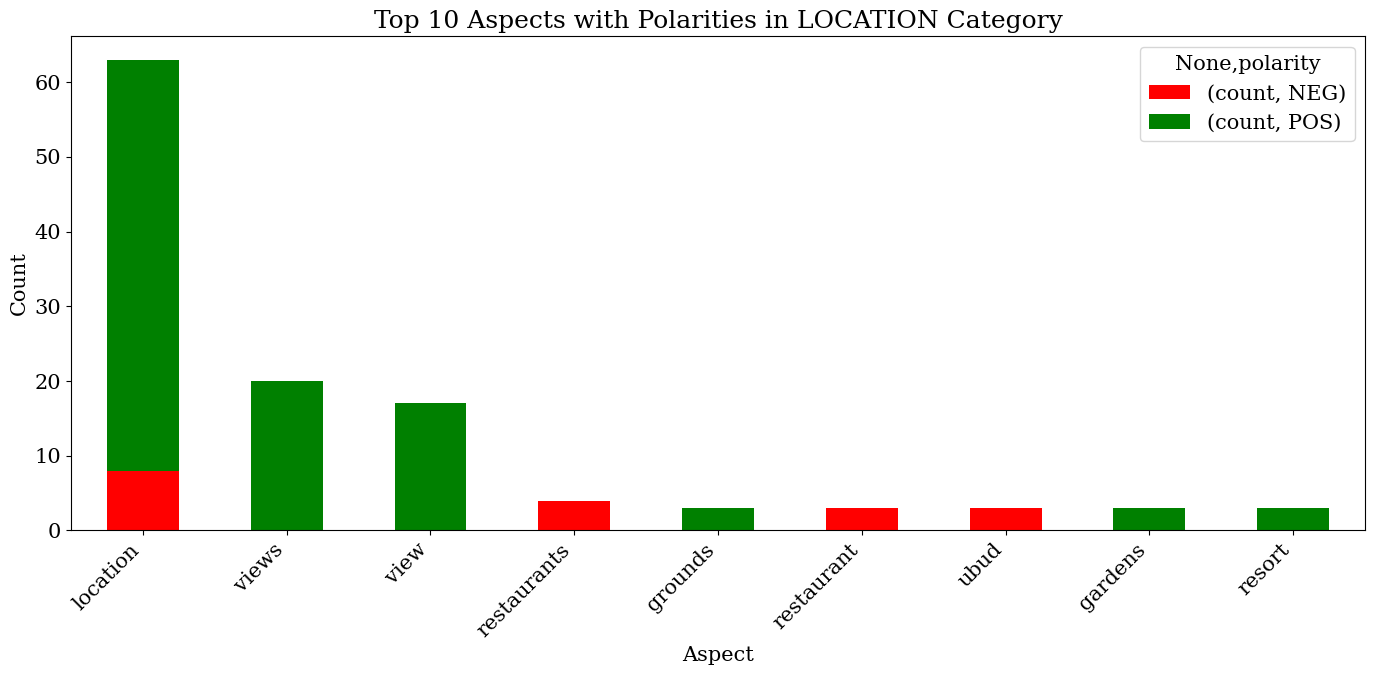

Top aspects with polarities for FOOD category:
                            count
aspect            polarity       
breakfast         NEG          21
                  POS          18
food              NEG           9
                  POS           8
restaurant        NEG           6
                  POS           4
food              NEU           4
food menu         NEG           2
restaurant        NEU           2
breakfast options NEG           2




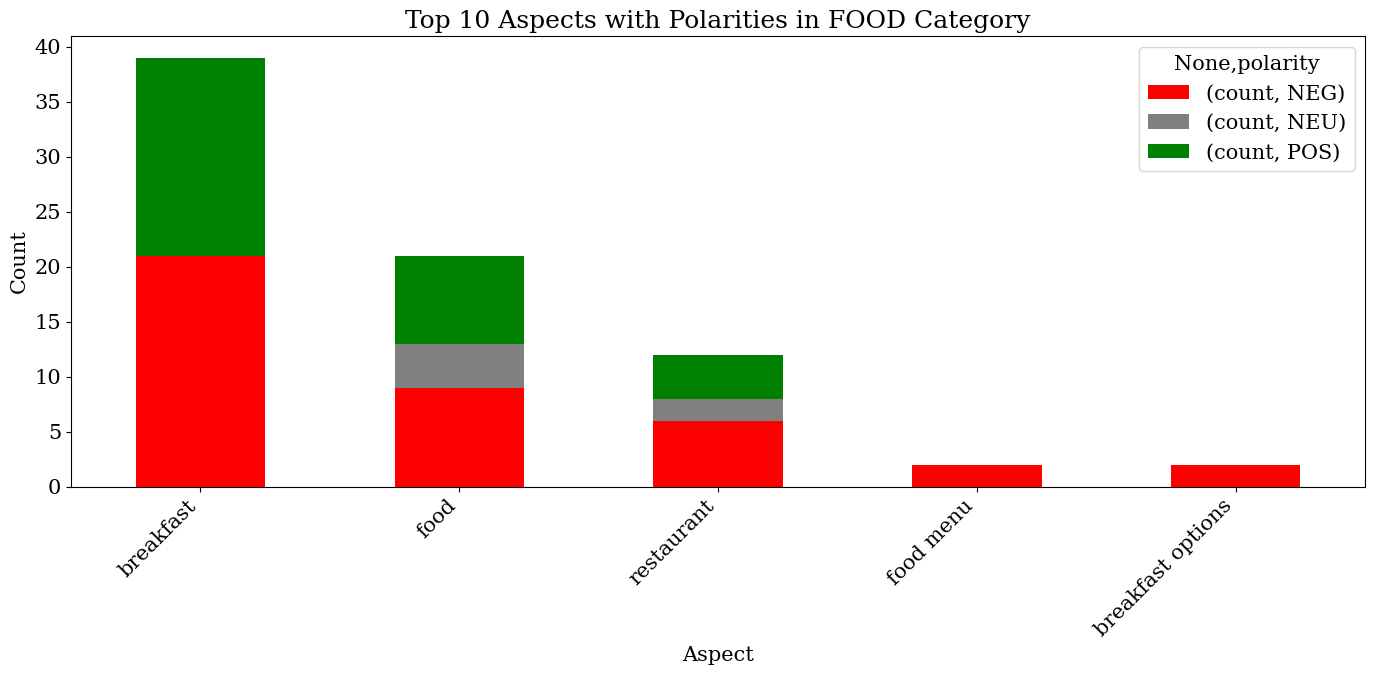

Top aspects with polarities for FACILITY category:
                        count
aspect        polarity       
pool          POS          23
              NEG           9
wifi          NEG           8
swimming pool POS           7
pools         NEG           6
              POS           6
facilities    NEG           6
              POS           4
pool area     POS           4
infinity pool POS           2




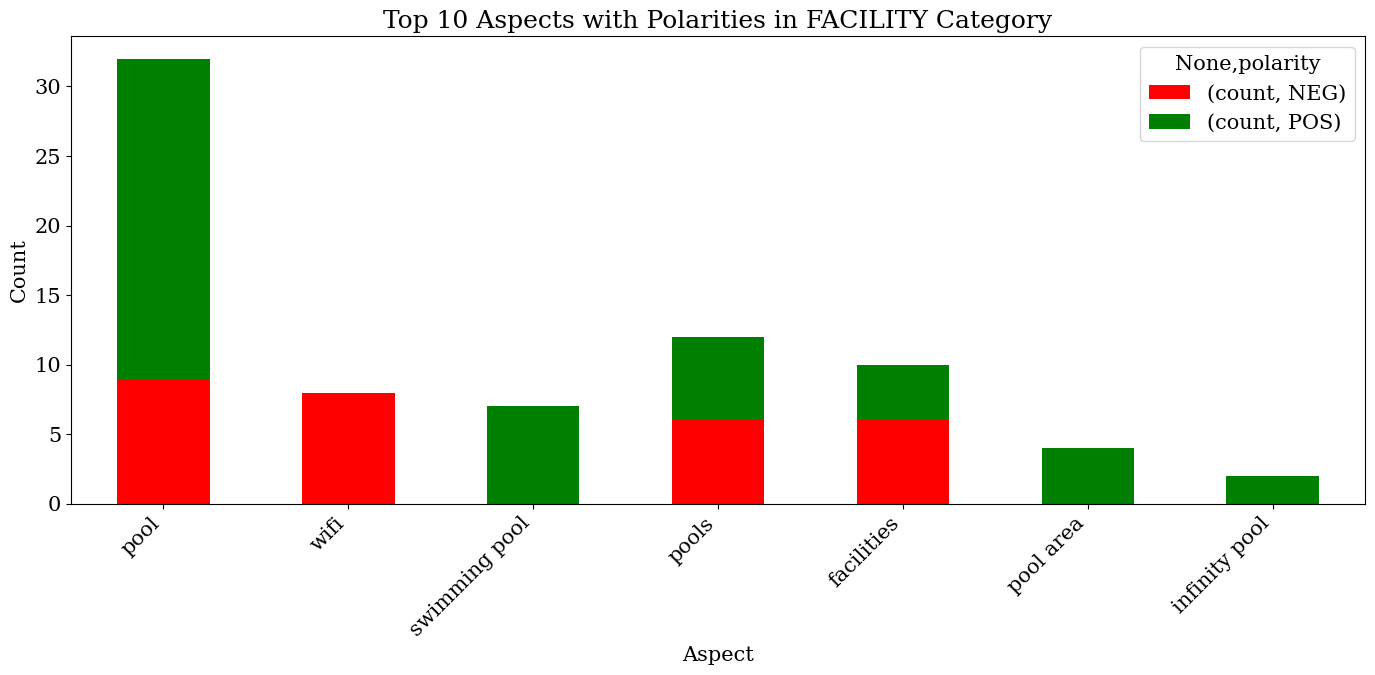

Top aspects with polarities for SERVICE category:
                              count
aspect              polarity       
staff               POS          82
service             POS          12
staff               NEG           8
people              POS           4
taxi                POS           3
owner               POS           3
staffs              POS           3
bartender           NEG           1
spa service         NEG           1
shuttle to the city NEG           1




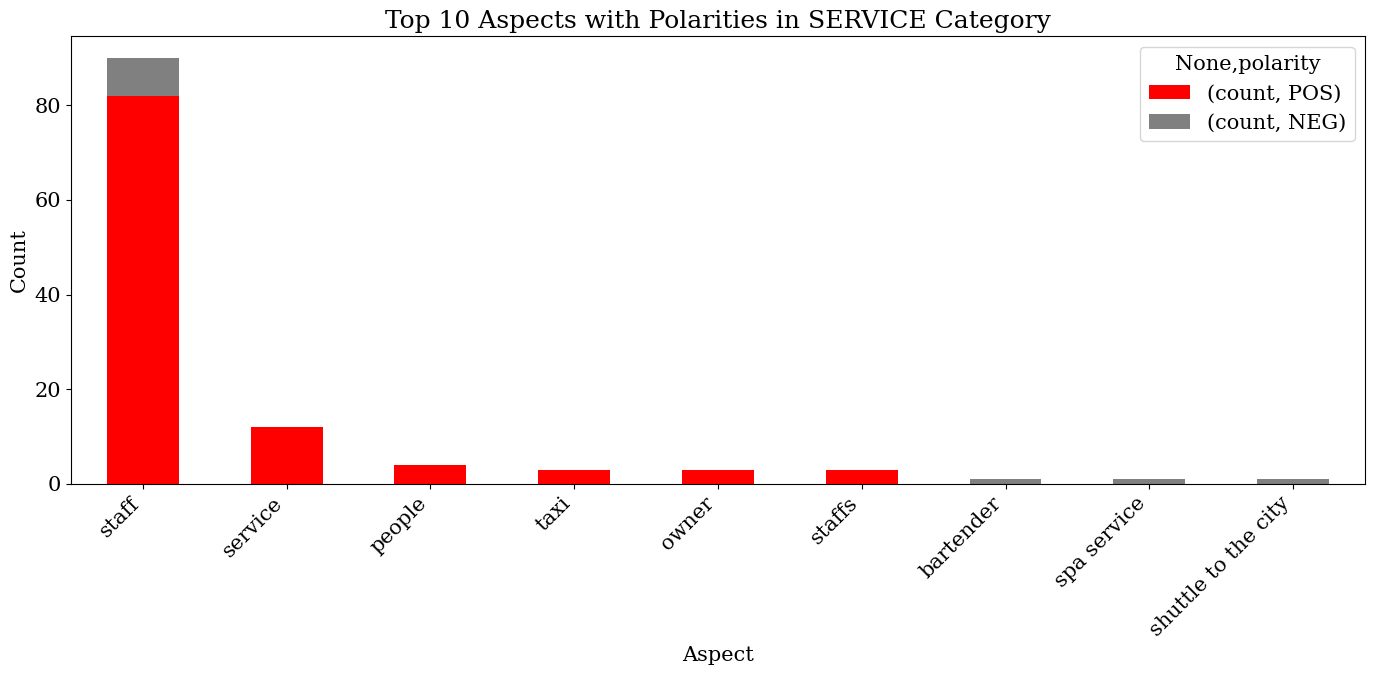

Top aspects with polarities for ROOM category:
                   count
aspect   polarity       
room     POS          22
rooms    POS          18
view     POS          17
room     NEG          12
bathroom NEG          11
rooms    NEG           9
bed      NEG           6
views    POS           5
bathroom POS           4
bed      POS           4




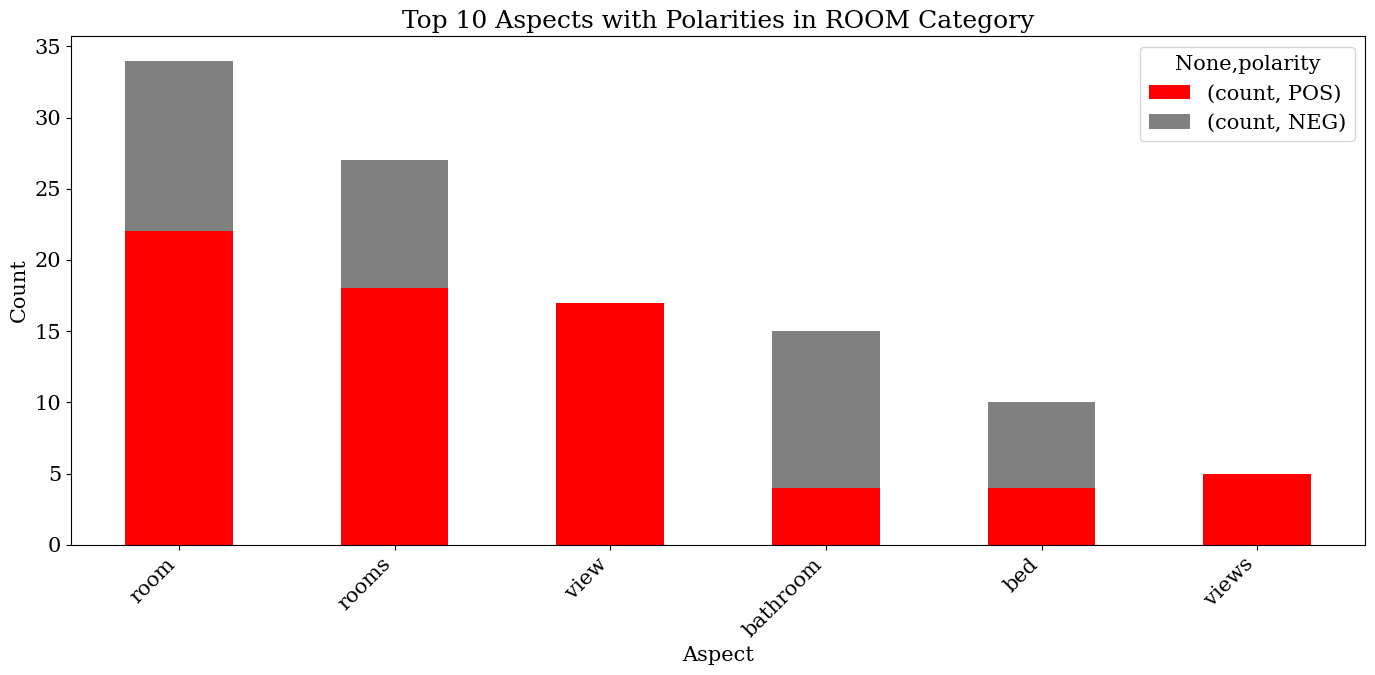

In [4]:
# Ensure the correct column name is used and convert if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract and count aspects with polarities for each main category
category_aspect_polarity_counts = defaultdict(Counter)

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category'].split('#')[0]  # Extract main category
        aspect = quad['aspect'].lower()  # Handle aspects case-insensitively
        polarity = quad['polarity']
        aspect_polarity = (aspect, polarity)
        category_aspect_polarity_counts[category][aspect_polarity] += 1

# Prepare data for visualization
category_aspect_polarity_df = {}

for category, aspect_polarity_counter in category_aspect_polarity_counts.items():
    # Convert to DataFrame and sort by count
    aspect_polarity_df = pd.DataFrame.from_dict(aspect_polarity_counter, orient='index', columns=['count']).sort_values(by='count', ascending=False)
    aspect_polarity_df.index = pd.MultiIndex.from_tuples(aspect_polarity_df.index, names=['aspect', 'polarity'])
    category_aspect_polarity_df[category] = aspect_polarity_df

# Define colors for each polarity
colors = {
    'POS': 'green',
    'NEG': 'red',
    'NEU': 'gray'
}

# Display the ranked aspects with polarities for each main category
for category, aspect_polarity_df in category_aspect_polarity_df.items():
    print(f"Top aspects with polarities for {category} category:")
    print(aspect_polarity_df.head(10))  # Display top 10 aspects for each category
    print("\n")

    # Prepare data for plotting
    top_aspects = aspect_polarity_df.head(10)
    top_aspects_unstacked = top_aspects.unstack().fillna(0)

    # Ensure consistent colors for the polarities
    if isinstance(top_aspects_unstacked.columns, pd.MultiIndex):
        polarity_levels = top_aspects_unstacked.columns.levels[1]
    else:
        polarity_levels = top_aspects_unstacked.columns

    # Assign colors based on polarity
    assigned_colors = [colors.get(polarity, 'blue') for polarity in polarity_levels]

    # Plot the ranked aspects with polarities for each category
    ax = top_aspects_unstacked.plot(
        kind='bar', 
        stacked=True, 
        figsize=(14, 7), 
        color=assigned_colors
    )
    plt.title(f'Top 10 Aspects with Polarities in {category} Category')
    plt.xlabel('Aspect')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


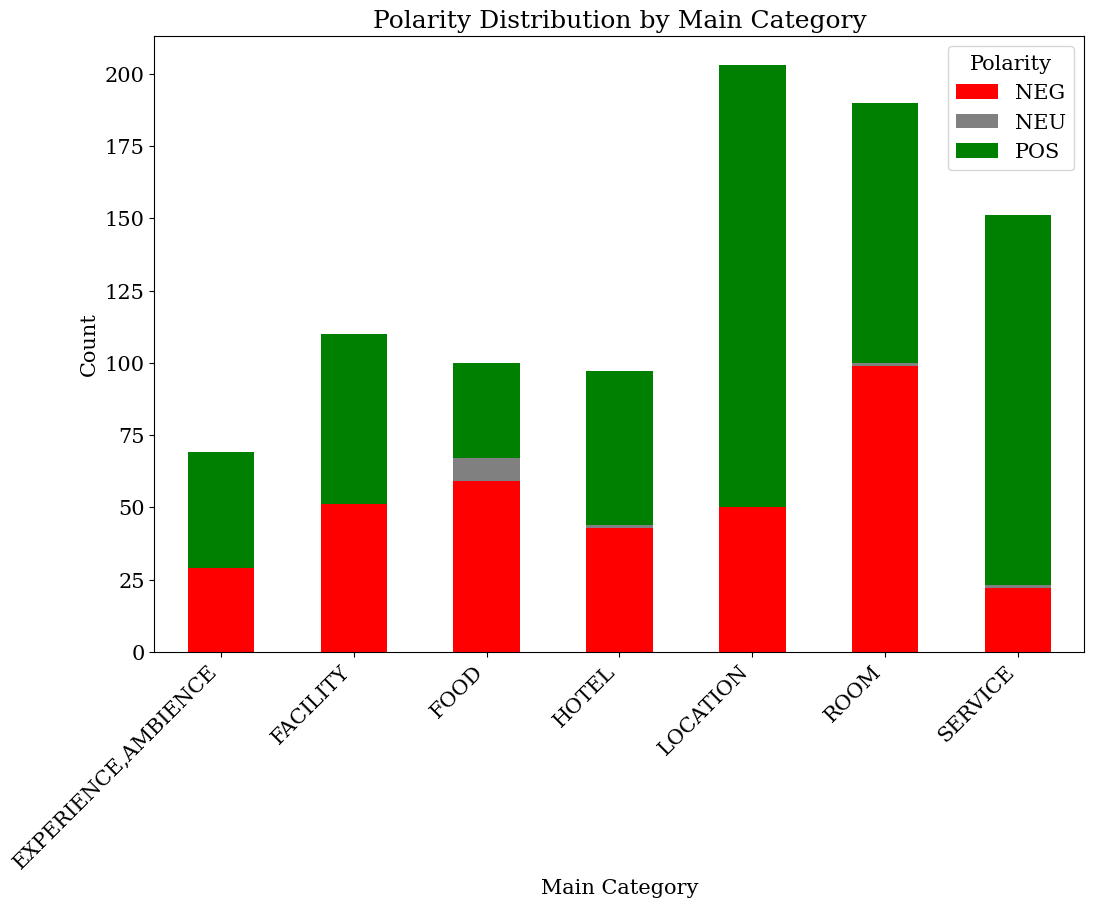

In [12]:
# Extract main category-polarity combinations
main_category_polarity = []
for quads in df_predictions['quadruples']:
    for quad in quads:
        main_category = quad['category'].split('#')[0]  # Adjust split character based on your data format
        main_category_polarity.append((main_category, quad['polarity']))

# Count occurrences of each main category-polarity combination
main_category_polarity_counts = Counter(main_category_polarity)

# Create a DataFrame for visualization
main_category_polarity_df = pd.DataFrame.from_dict(main_category_polarity_counts, orient='index', columns=['count'])
main_category_polarity_df.index = pd.MultiIndex.from_tuples(main_category_polarity_df.index, names=['Category', 'Polarity'])
main_category_polarity_df = main_category_polarity_df.reset_index()

# Pivot the DataFrame to have categories as rows and polarities as columns
pivot_df = main_category_polarity_df.pivot(index='Category', columns='Polarity', values='count').fillna(0)

# Define colors for each polarity
colors = {'NEG': 'red', 'NEU': 'gray', 'POS': 'green'}

# Plot the polarity distribution for each main category with specific colors for each polarity
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors.get(x, '#333333') for x in pivot_df.columns])
plt.title('Polarity Distribution by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

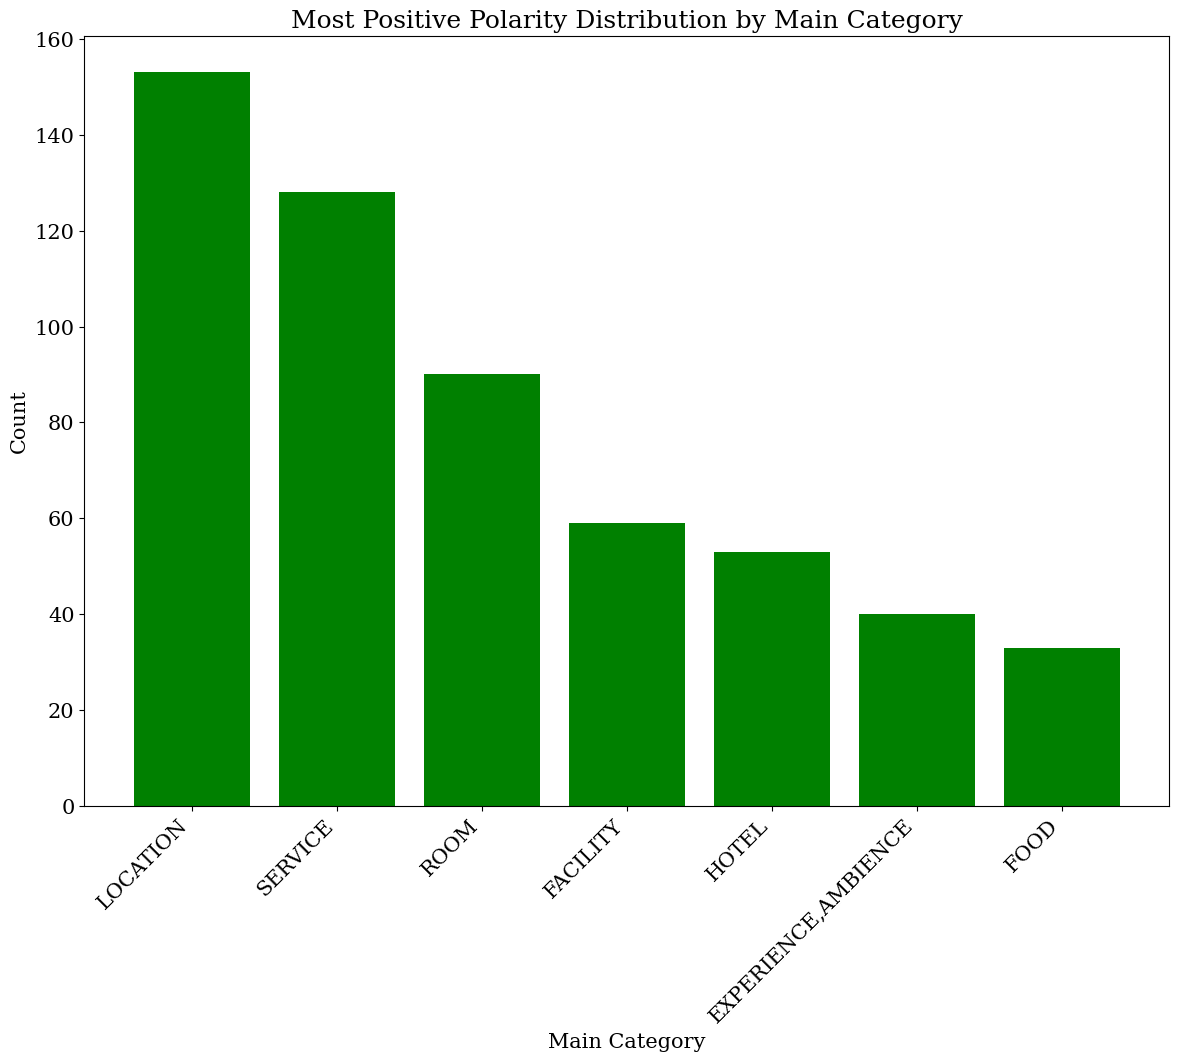

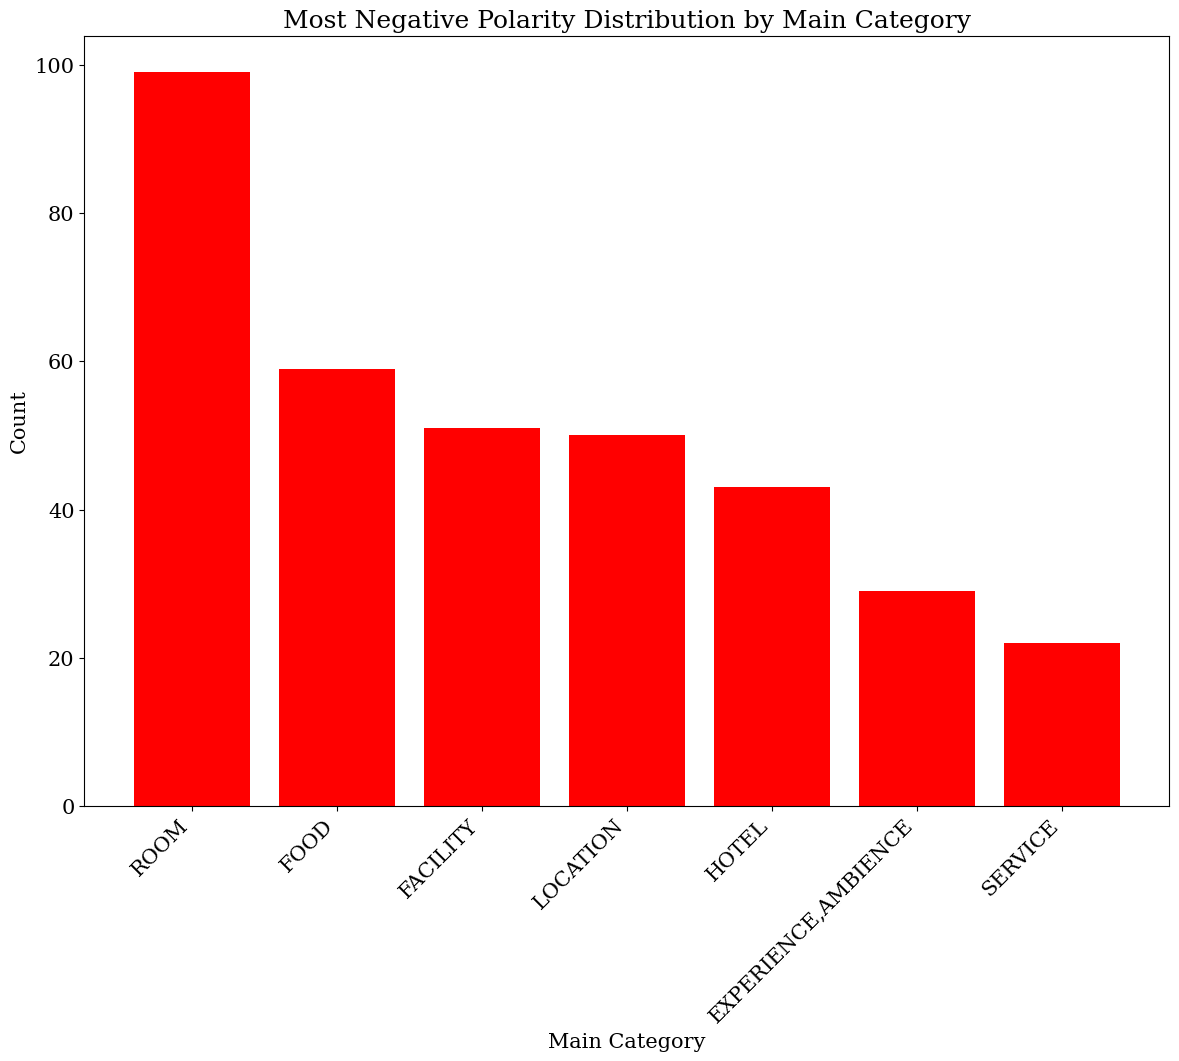

Most Positive Polarity Distribution by Main Category:
Polarity             Category    POS
4                    LOCATION  153.0
6                     SERVICE  128.0
5                        ROOM   90.0
1                    FACILITY   59.0
3                       HOTEL   53.0
0         EXPERIENCE,AMBIENCE   40.0
2                        FOOD   33.0

Most Negative Polarity Distribution by Main Category:
Polarity             Category   NEG
5                        ROOM  99.0
2                        FOOD  59.0
1                    FACILITY  51.0
4                    LOCATION  50.0
3                       HOTEL  43.0
0         EXPERIENCE,AMBIENCE  29.0
6                     SERVICE  22.0


In [16]:
# Extract main category-polarity combinations
main_category_polarity = []
for quads in df_predictions['quadruples']:
    for quad in quads:
        main_category = quad['category'].split('#')[0]  # Adjust split character based on your data format
        main_category_polarity.append((main_category, quad['polarity']))

# Count occurrences of each main category-polarity combination
main_category_polarity_counts = Counter(main_category_polarity)


# Create a DataFrame for visualization
main_category_polarity_df = pd.DataFrame.from_dict(main_category_polarity_counts, orient='index', columns=['count'])
main_category_polarity_df.index = pd.MultiIndex.from_tuples(main_category_polarity_df.index, names=['Category', 'Polarity'])
main_category_polarity_df = main_category_polarity_df.reset_index()

# Pivot the DataFrame to have categories as rows and polarities as columns
pivot_df = main_category_polarity_df.pivot(index='Category', columns='Polarity', values='count').fillna(0)

# Select only the relevant columns for positive and negative polarities
positive_polarity_df = pivot_df[['POS']].reset_index()
negative_polarity_df = pivot_df[['NEG']].reset_index()

# Sort the DataFrames by count in descending order
positive_polarity_df = positive_polarity_df.sort_values(by='POS', ascending=False)
negative_polarity_df = negative_polarity_df.sort_values(by='NEG', ascending=False)

# Plot the most positive polarity distribution for each category
plt.figure(figsize=(14, 10))
plt.bar(positive_polarity_df['Category'], positive_polarity_df['POS'], color='green')
plt.title('Most Positive Polarity Distribution by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot the most negative polarity distribution for each category
plt.figure(figsize=(14, 10))
plt.bar(negative_polarity_df['Category'], negative_polarity_df['NEG'], color='red')
plt.title('Most Negative Polarity Distribution by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the ranked DataFrames
print("Most Positive Polarity Distribution by Main Category:")
print(positive_polarity_df)

print("\nMost Negative Polarity Distribution by Main Category:")
print(negative_polarity_df)

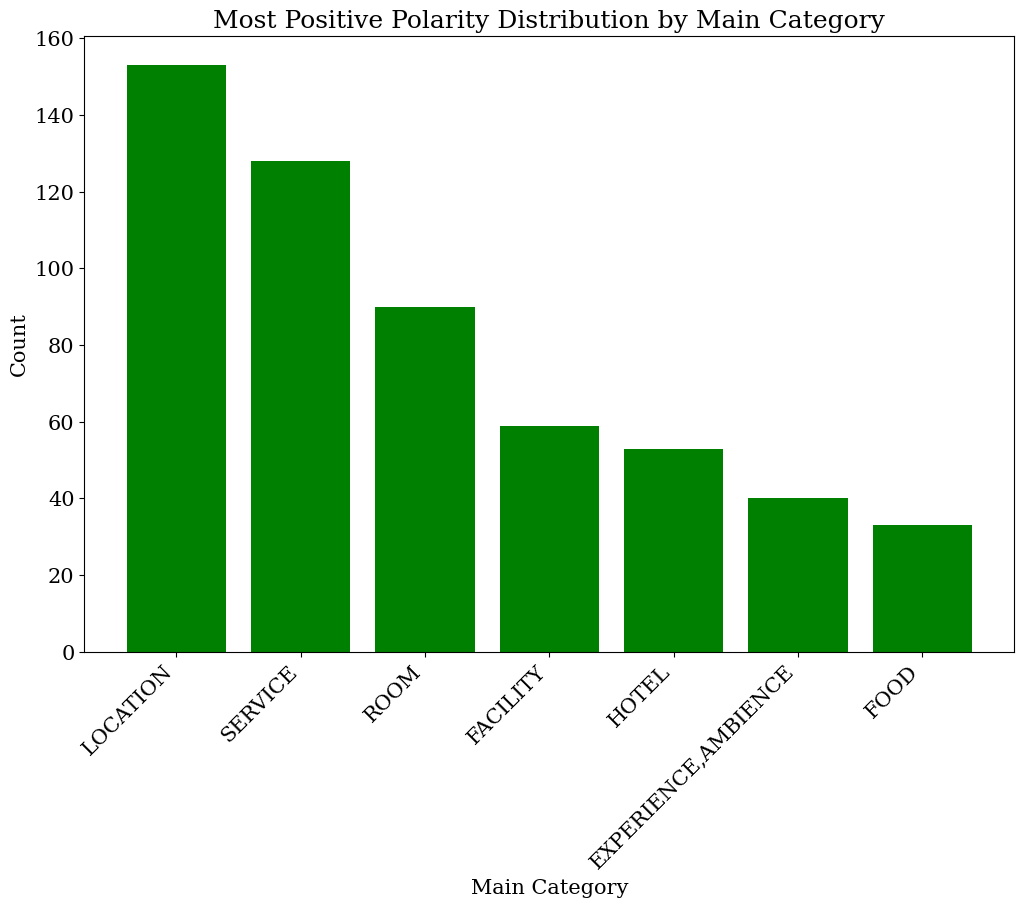

,Category,Most Positive Polarity,Count
4,LOCATION,POS,153.0
6,SERVICE,POS,128.0
5,ROOM,NEG,90.0
1,FACILITY,POS,59.0
3,HOTEL,POS,53.0
0,"EXPERIENCE,AMBIENCE",POS,40.0
2,FOOD,NEG,33.0


In [15]:
# Extract main category-polarity combinations
main_category_polarity = []
for quads in df_predictions['quadruples']:
    for quad in quads:
        main_category = quad['category'].split('#')[0]  # Adjust split character based on your data format
        main_category_polarity.append((main_category, quad['polarity']))

# Count occurrences of each main category-polarity combination
main_category_polarity_counts = Counter(main_category_polarity)

# Create a DataFrame for visualization
main_category_polarity_df = pd.DataFrame.from_dict(main_category_polarity_counts, orient='index', columns=['count'])
main_category_polarity_df.index = pd.MultiIndex.from_tuples(main_category_polarity_df.index, names=['Category', 'Polarity'])
main_category_polarity_df = main_category_polarity_df.reset_index()

# Pivot the DataFrame to have categories as rows and polarities as columns
pivot_df = main_category_polarity_df.pivot(index='Category', columns='Polarity', values='count').fillna(0)

# Identify the polarity with the highest count for each category
most_positive_polarity_df = pivot_df.idxmax(axis=1).reset_index()
most_positive_polarity_df.columns = ['Category', 'Most Positive Polarity']

# Merge with the counts
most_positive_polarity_df = most_positive_polarity_df.merge(pivot_df.reset_index(), on='Category')

# Select only the relevant columns
most_positive_polarity_df = most_positive_polarity_df[['Category', 'Most Positive Polarity', 'POS']].rename(columns={'POS': 'Count'})

# Sort by count in descending order
most_positive_polarity_df = most_positive_polarity_df.sort_values(by='Count', ascending=False)

# Plot the most positive polarity distribution for each category
plt.figure(figsize=(12, 8))
plt.bar(most_positive_polarity_df['Category'], most_positive_polarity_df['Count'], color='green')
plt.title('Most Positive Polarity Distribution by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the ranked DataFrame
most_positive_polarity_df

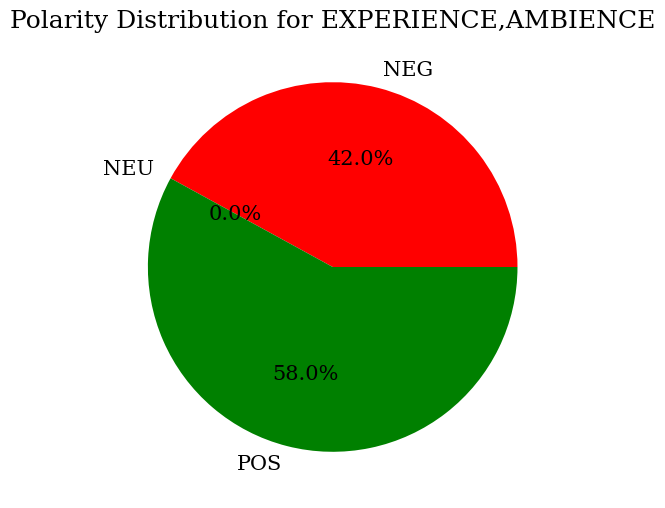

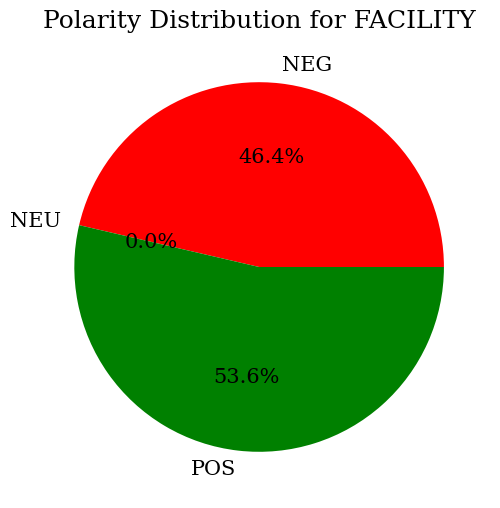

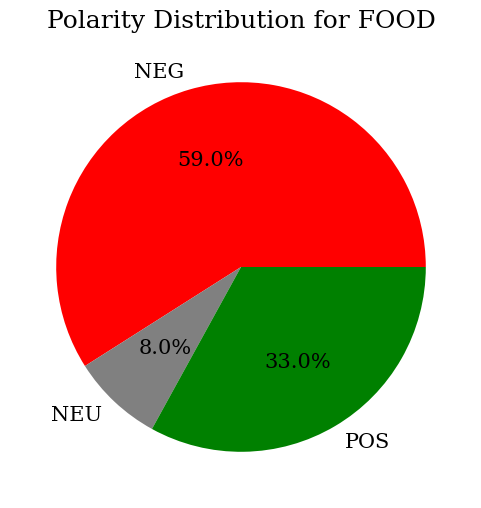

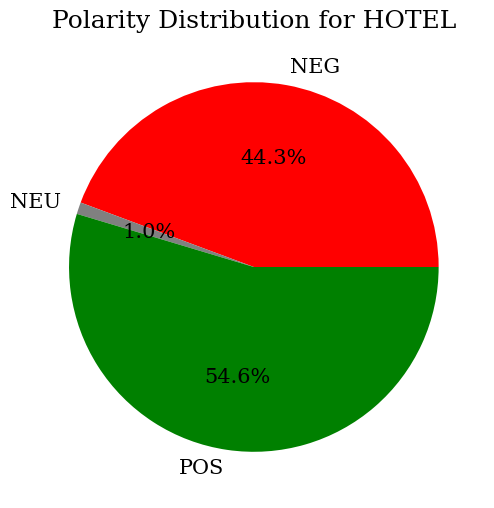

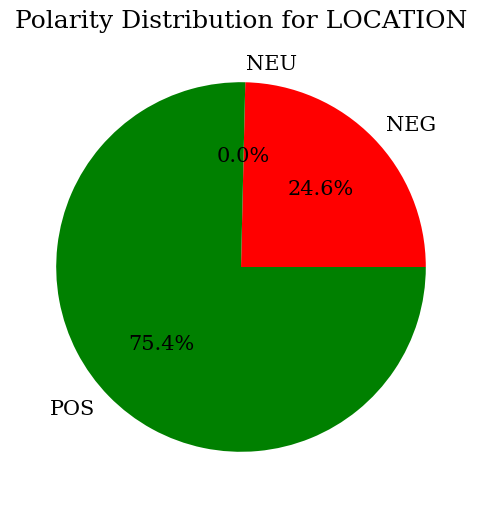

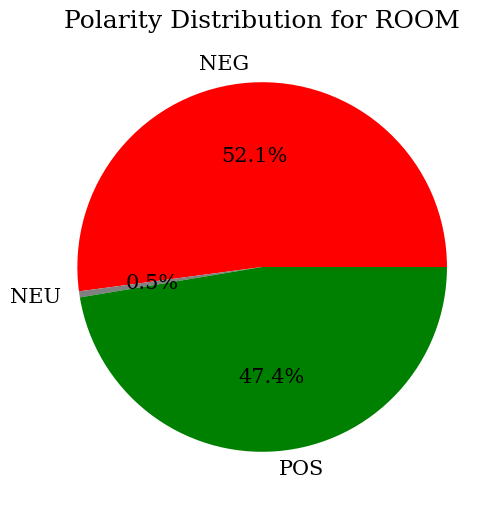

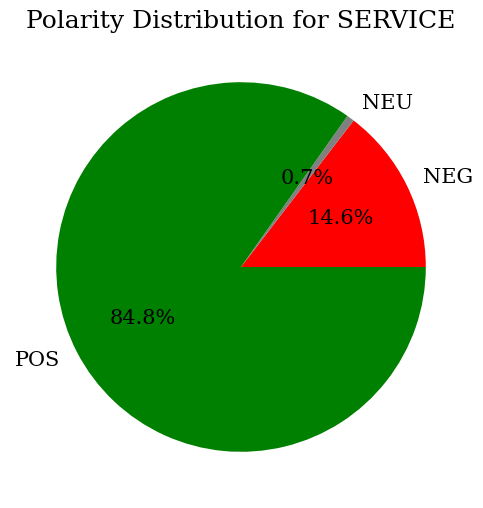

In [17]:
# Pivot the DataFrame to have categories as rows and polarities as columns
pivot_df = main_category_polarity_df.pivot(index='Category', columns='Polarity', values='count').fillna(0)

# Define colors for each polarity
colors = {'NEG': 'red', 'NEU': 'gray', 'POS': 'green'}

# Create pie charts for each category
for category in pivot_df.index:
    plt.figure(figsize=(6, 6))
    plt.pie(pivot_df.loc[category], labels=pivot_df.columns, autopct='%1.1f%%', colors=[colors[col] for col in pivot_df.columns])
    plt.title(f'Polarity Distribution for {category}')
    plt.show()

NameError: name 'WordCloud' is not defined

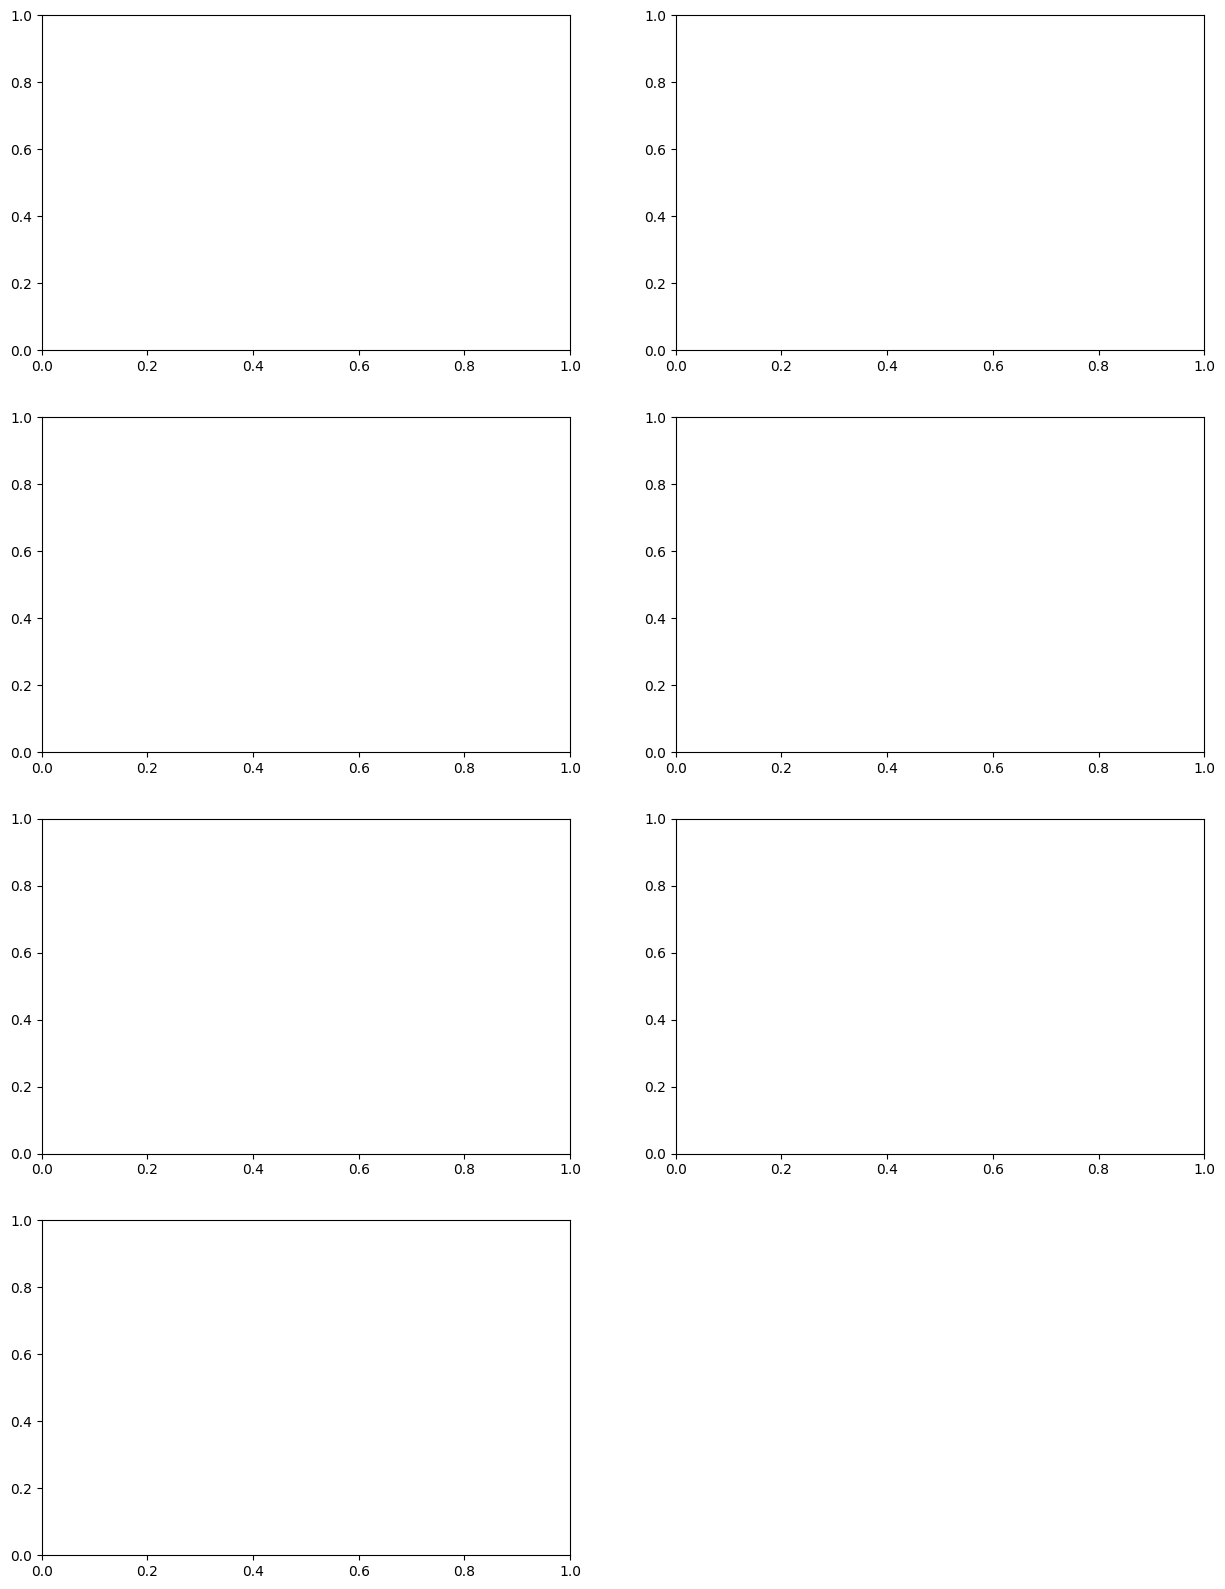

In [10]:
# Ensure the correct column name is used and convert if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract opinions for each main category
category_opinions = defaultdict(list)

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category'].split('#')[0]  # Extract main category
        opinion = quad['opinion']
        category_opinions[category].append(opinion)

# Determine the number of rows and columns for the grid layout
num_categories = len(category_opinions)
cols = 2  # You can adjust this number based on how many columns you want
rows = (num_categories // cols) + (num_categories % cols > 0)

# Generate and display word clouds for each main category
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes for easy iteration if it's a 2D array
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Hide any unused subplots
for i in range(num_categories, len(axes)):
    fig.delaxes(axes[i])

for ax, (category, opinions) in zip(axes, category_opinions.items()):
    opinions_text = ' '.join(opinions)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opinions_text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f' {category} Category')
    ax.axis('off')

plt.tight_layout()
plt.show()

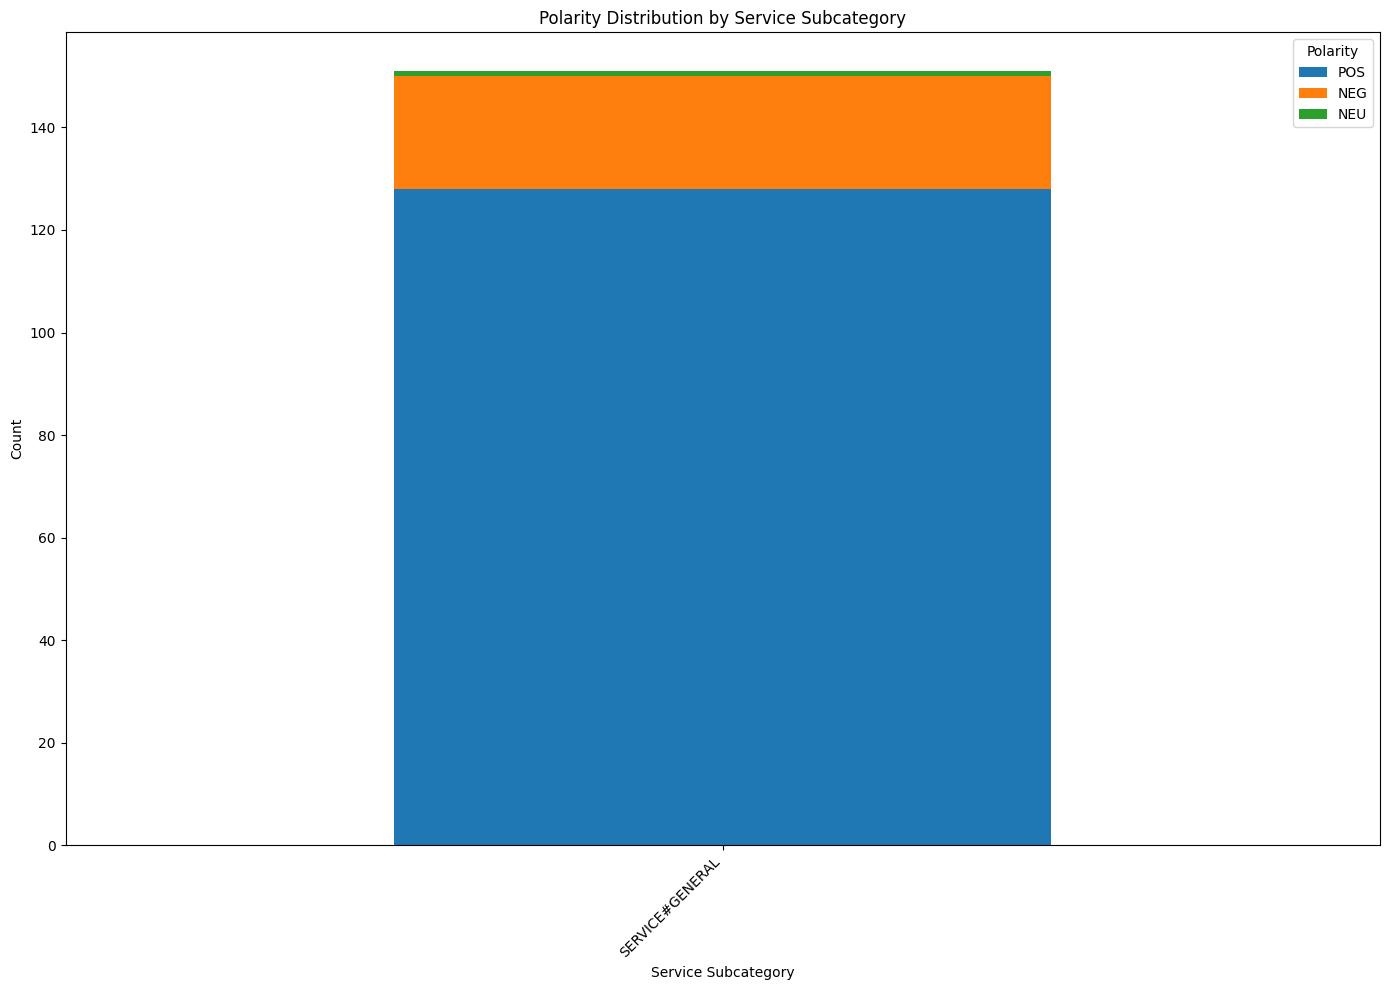

In [6]:
hotel_subcategories = defaultdict(Counter)

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category']
        if category.startswith('SERVICE#'):  # Filter only location-related categories
            polarity = quad['polarity']
            hotel_subcategories[category][polarity] += 1

# Convert to a DataFrame for visualization
hotel_subcategory_df = pd.DataFrame(hotel_subcategories).fillna(0).astype(int).T

# Plot the polarity distribution for each subcategory
ax = hotel_subcategory_df.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Polarity Distribution by Service Subcategory')
plt.xlabel('Service Subcategory')
plt.ylabel('Count')
plt.legend(title='Polarity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()